<br><br>
<font size='6'><b>K-Nearest Neighbor (KNN)</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Supervised-Learning" data-toc-modified-id="1.-Supervised-Learning-1">1. Supervised Learning</a></span></li><li><span><a href="#2.-K-Nearest-Neighbor-(KNN)-Regression" data-toc-modified-id="2.-K-Nearest-Neighbor-(KNN)-Regression-2">2. K-Nearest Neighbor (KNN) Regression</a></span></li><li><span><a href="#3.-K-Nearest-Neighbor-(KNN)-Classification" data-toc-modified-id="3.-K-Nearest-Neighbor-(KNN)-Classification-3">3. K-Nearest Neighbor (KNN) Classification</a></span></li></ul></div>

# 1. Supervised Learning


- Given training set $\left\{ \left(x^{(1)}, y^{(1)}\right), \left(x^{(2)}, y^{(2)}\right),\cdots,\left(x^{(m)}, y^{(m)}\right) \right\}$


- Want to find a function $f_{\omega}$ with <font color = 'red'>learning parameter</font>, $\omega$
    - $f_{\omega}$ desired to be as close as possible to $y$ for future $(x,y)$
    - $i.e., f_{\omega}(x) \approx y$


- Define a loss function 

$$\ell \left(f_{\omega} \left(x^{(i)}\right), y^{(i)}\right)$$


- Solve the following optimization problem:

$$ 
\begin{align*}
\text{minimize} &\quad \frac{1}{m} \sum_{i=1}^{m} \ell \left(f_{\omega} \left(x^{(i)}\right), y^{(i)}\right)\\
\text{subject to} &\quad \omega \in \boldsymbol{\omega}
\end{align*}
$$
<br>

- Function approximation between inputs and outputs

<br>
<center><img src='./image_files/func_approx.png' width = 250></center>

- Once it is learned,


<center><img src='./image_files/once_learned.png' width = 400></center>

# 2. K-Nearest Neighbor (KNN) Regression

- Non-parametric method


We write our model as

$$y = f(x) + \varepsilon$$

where $\varepsilon$ captures measurement errors and other discrepancies.


Then, with a good  $f$  we can make predictions of  $y$  at new points  $x_{\text{new}}$ . One possible way so called "nearest neighbor method" is:

<br>
$$\hat y = \text{avg} \left(y \mid x \in \mathcal{N}(x_{\text{new}}) \right)$$

where $\mathcal{N}(x)$ is some neighborhood of $x$

<br>
<img src='./image_files/neighborhood_estimate.png' width = 500>

- Data generation

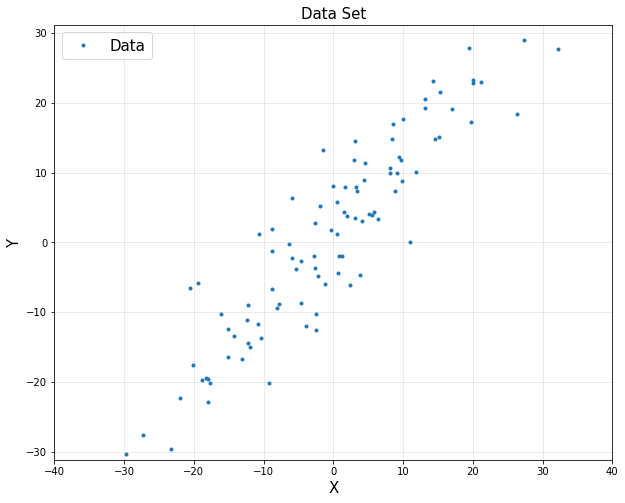

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make noisy data
'''
100개의 데이터
ex) y = 2*x + 1 + random noise(epsilon)
(Hint : np.random.normal)
'''
x = np.random.normal(0, 15, 100).reshape(-1,1) #평균, 표준편차, Data수
y = 1*x + 1 + 5*np.random.normal(0, 1, 100).reshape(-1,1)

plt.figure(figsize = (10, 8))
plt.title('Data Set', fontsize = 15)
plt.plot(x, y, '.', label = 'Data')
plt.legend(fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

In [7]:
from sklearn import neighbors

reg = neighbors.KNeighborsRegressor(n_neighbors = 3)
reg.fit(x, y)
# fit 할 때의 shape (sample수, feature수)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


KNeighborsRegressor(n_neighbors=3)

In [17]:
'''
Evenly spaced numbers over a specified interval (-30, 30).
xp = ?
(Hint : np.linspace & reshape(-1,1))
'''
xp = np.linspace(-30,30,100).reshape(-1,1)

yp = reg.predict(xp)

In [24]:
x_new = np.array([[10]]) #shape 1,1로만들기 위해서 대괄호사용,reshape도 가능
pred = reg.predict(x_new)[0,0] 
print(pred)

11.942258525345826


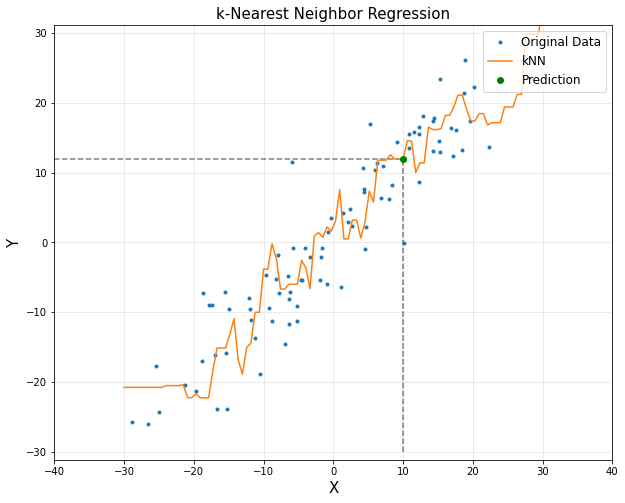

In [43]:
# Plot K-Nearest Neighbor Regression
plt.figure(figsize = (10, 8))
plt.title('k-Nearest Neighbor Regression', fontsize = 15)

'''
<plot>
Original Data : dot ('.')
kNN : line ()
Prediction : circle marker ('o') using x_new & pred
'''
plt.plot(x, y, '.', label = 'Original Data')
plt.plot(xp, yp, label = 'kNN')
plt.plot(x_new, pred, 'go', label = 'Prediction')
plt.vlines(x_new, -30, pred, 'k', 'dashed', alpha = 0.5)
plt.hlines(pred, -40, x_new, 'k', 'dashed', alpha = 0.5)

plt.legend(fontsize = 12, loc = 1)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

In [60]:
'''
n_neighbors = 31
reg.fit()
'''
reg = neighbors.KNeighborsRegressor(n_neighbors = 31)
reg.fit(x, y)

'''
Evenly spaced numbers over a specified interval (-30, 30). 100개
xp = ?
(Hint : np.linspace)
'''
xp = np.linspace(-30,30,100).reshape(-1,1)
yp = reg.predict(xp)

x_new = np.array([[10]])
pred = reg.predict(x_new)[0,0]
print(pred)

10.447677503242597


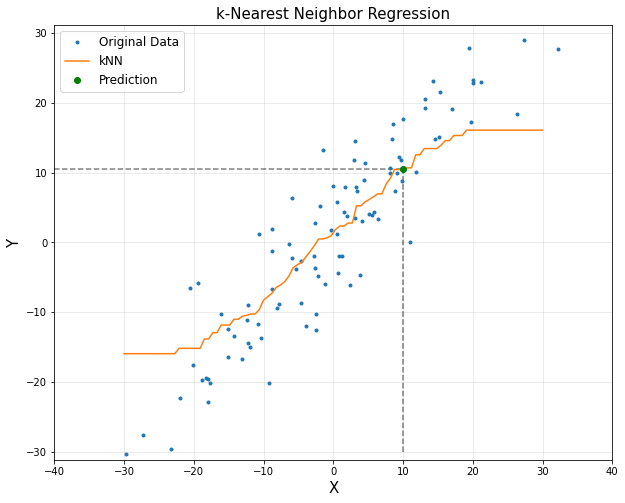

In [61]:
plt.figure(figsize = (10, 8))
plt.title('k-Nearest Neighbor Regression', fontsize=15)

'''
<plot>
Original Data : dot ('.')
Regression Result : line ()
Prediction : circle marker ('o')
'''
plt.plot(x, y, '.', label = 'Original Data')
plt.plot(xp, yp, label = 'kNN')
plt.plot(x_new, pred, 'go', label = 'Prediction')
plt.vlines(x_new, -30, pred, 'k', 'dashed', alpha = 0.5)
plt.hlines(pred, -40, x_new, 'k', 'dashed', alpha = 0.5)

plt.legend(fontsize = 12)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

# 3. K-Nearest Neighbor (KNN) Classification

- Non-parametric method


- In k-NN classification, an object is assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small).
- If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.

<img src = "./image_files/KNN 1_100.png" width=50%>

- Zoom in,

<img src = "./image_files/knn_img.png" width=30%>

- Data generation

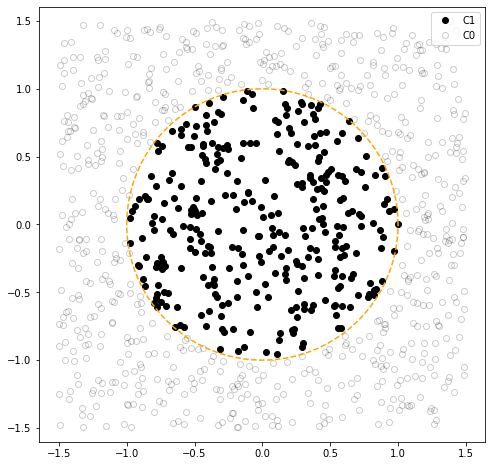

In [65]:
m = 1000
X = -1.5 + 3*np.random.uniform(size = (m,2))

'''
Labeling data using y
1 : in circle(단위원)
0 : otherwise
(Hint : np.linalg.norm())
'''
y = np.zeros([m,1])

y = np.linalg.norm(X, 2, axis=1, keepdims=True) < 1
'''
for i in range(m) :
    if np.linalg.norm(X[i,:],2) <= 1:
        y[i] = 1
'''

C1 = np.where(y == 1)[0]
C0 = np.where(y == 0)[0]

theta = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize = (8,8))
plt.plot(X[C1,0], X[C1,1], 'ko', label = 'C1')
plt.plot(X[C0,0], X[C0,1], 'ko', label = 'C0', mfc = 'None', alpha = 0.2)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

- k - Nearest Neighbors (K=1)

In [66]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, np.ravel(y))

KNeighborsClassifier(n_neighbors=1)

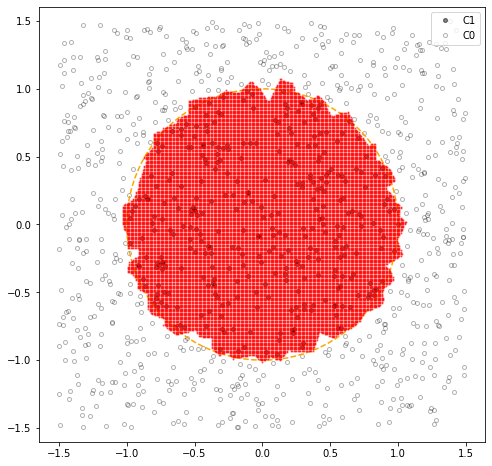

In [67]:
'''
Make meshgrid
[X1gr, X2gr] = ?
Xp = ?
(Hint : Nonlinear SVM with Kernel)
'''
res = 0.01 # resolution
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5, 1.5, res), np.arange(-1.5, 1.5, res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

When outliers exist

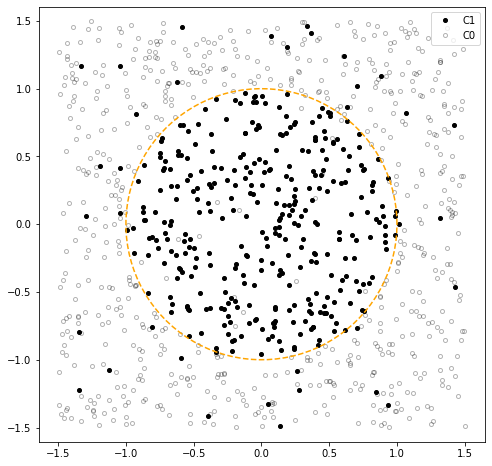

In [68]:
m = 1000
X = -1.5 + 3*np.random.uniform(size = (m,2))

y = np.zeros([m,1])
for i in range(m):
    if np.linalg.norm(X[i,:], 2) <= 1: # 반지름 1안에 있는 것 중에서
        if np.random.uniform() < 0.05: # 균일한 확률분포 0에서 1까지 생성해서 0.05보다 작은 확률
            y[i] = 0
        else:
            y[i] = 1    
    else:
        if np.random.uniform() < 0.05:
            y[i] = 1
        else:
            y[i] = 0

C1 = np.where(y == 1)[0]
C0 = np.where(y == 0)[0]

theta = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize = (8,8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor = 'k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

$k = 1$

<ipython-input-69-6e990bdda644>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X, y)


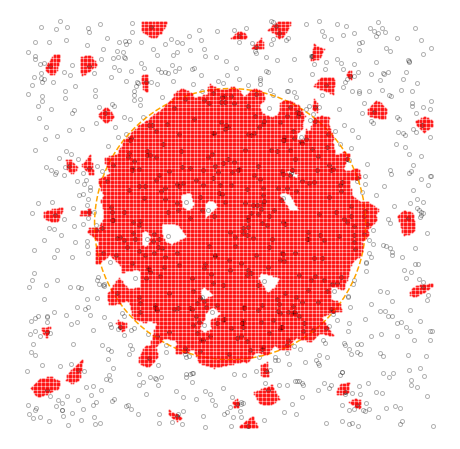

In [69]:
'''
kNN training
'''
clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, y)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   

$k = 11$

<ipython-input-70-02ee9fd7b605>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X, y)


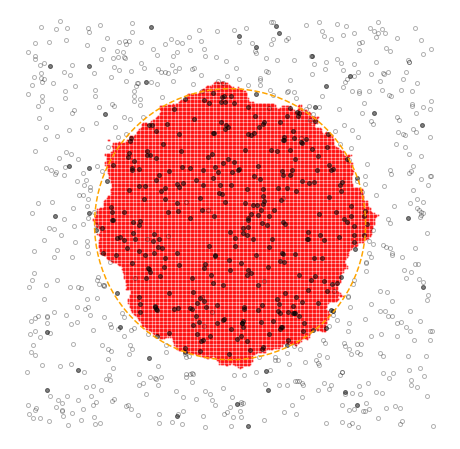

In [70]:
'''
kNN training
'''
clf = neighbors.KNeighborsClassifier(n_neighbors = 11)
clf.fit(X, y)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
# plt.legend(fontsize = 12)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   